<a href="https://colab.research.google.com/github/varvara-chornomorets/AI_EBD_MySQLEdu/blob/master/5_Ensemblelearning_partI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble learning

Please, make a copy of this colaboratory in order to be able to make changes **(File -> Save a copy in Drive)**.

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# For plotting like a pro
!pip install -q plotnine
from plotnine import *

## Basic ensemble via averaging (in the case of regression)

As in the lecture we shall start with the most basic form of ensemble learning - combining predictions from different models into one. Here we will look into combining linear regression algorithms (vanila, ridge and lasso). In practice you can use almost any regression model as part of such ensemble. Needless to say that combining predictions produced by the same model on the same data won't lead you anywhere.

In [ ]:
example_data = pd.DataFrame({'x':[1,2,3,4,5], 'y':[2,4,5,4,5]})

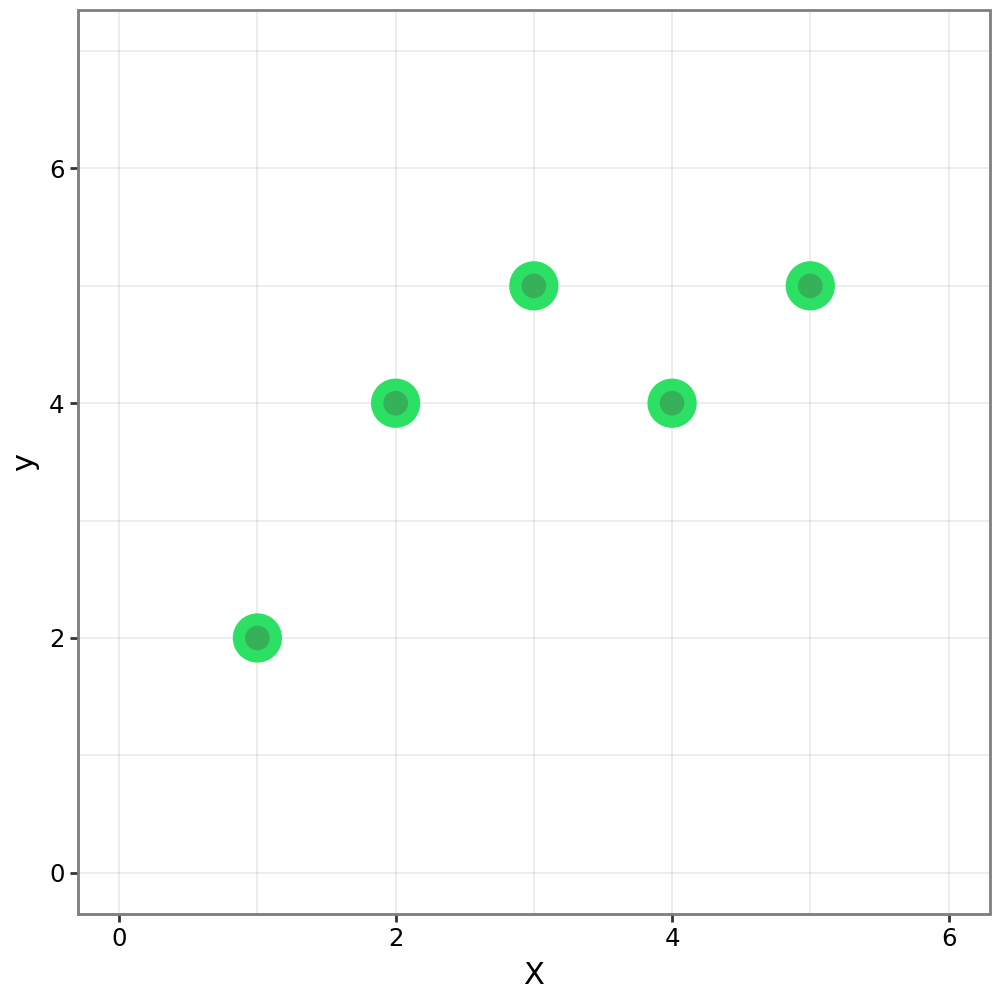

In [ ]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(fill = '#36B059',
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'X',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() +
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

Let's split this magnificently large dataset further to make `training` and `test` sets

In [ ]:
example_data

,x,y
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [ ]:
train_df = example_data.iloc[[0,2,3],:] # select 1st, 3rd and 4th samples into the training set
print(train_df)

test_df = example_data.iloc[[1,4],:] # select 2nd and 5th samples into the test set
print(test_df)

   x  y
0  1  2
2  3  5
3  4  4
   x  y
1  2  4
4  5  5


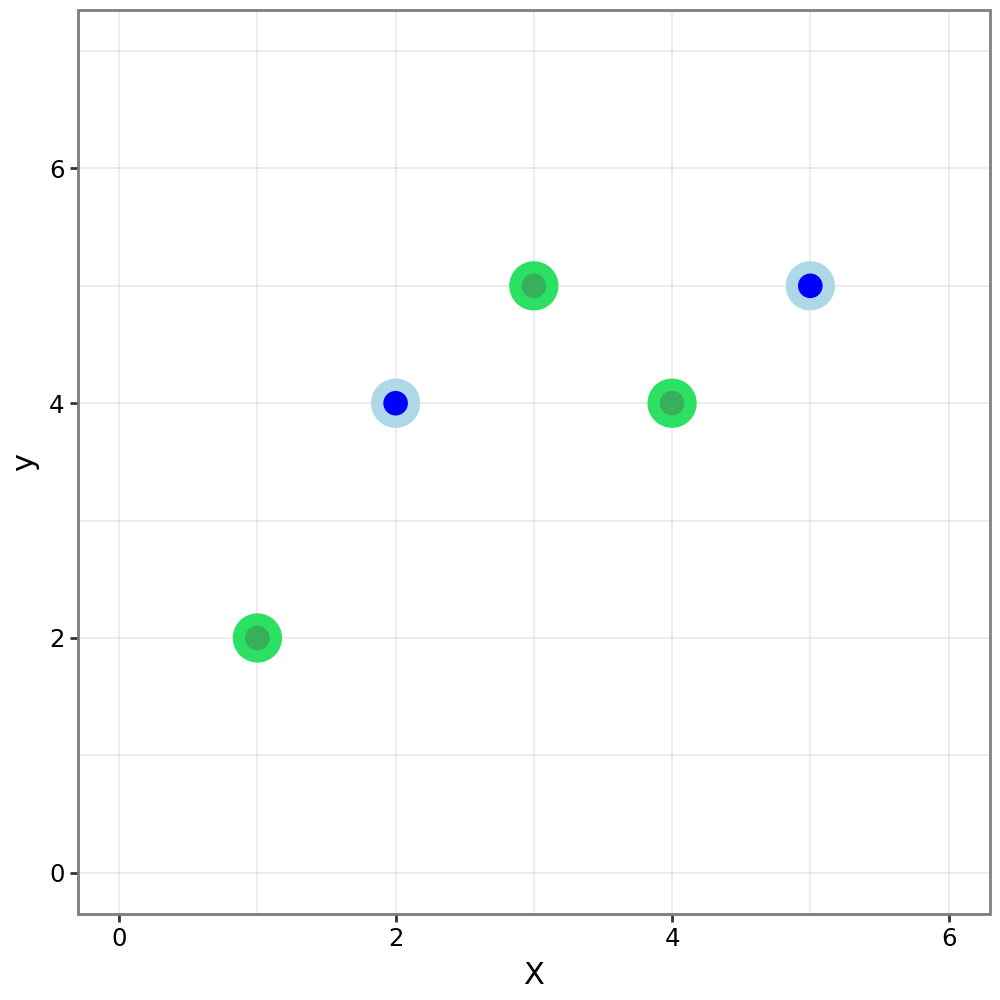

In [ ]:
fig = (
    ggplot(data = train_df,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(fill = '#36B059',
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'X',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() +
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)

fig = fig + geom_point(data = test_df,
          mapping = aes(x = 'x', y = 'y'), fill = 'blue',
               size = 5.0,
               stroke = 2.5,
               colour = 'lightblue',
               shape = 'o')
fig

Now that data is ready let's train three linear regression models: basic linear regression, ridge regression and lasso regression. Here is a code from the previous practice session:

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Initialising all three regression models
lr = LinearRegression()

lambda_ = 1

# Ridge regression (template)
lr_ridge = Ridge(lambda_)

# Lasso
lr_lasso = Lasso(lambda_)

We fit all three models on our improvised training data (`train_df`)

In [ ]:
lr.fit(train_df[['x']], train_df[['y']])
lr_ridge.fit(train_df[['x']], train_df[['y']])
lr_lasso.fit(train_df[['x']], train_df[['y']])

Lasso(alpha=1)

Visualise all three lines on one plot:

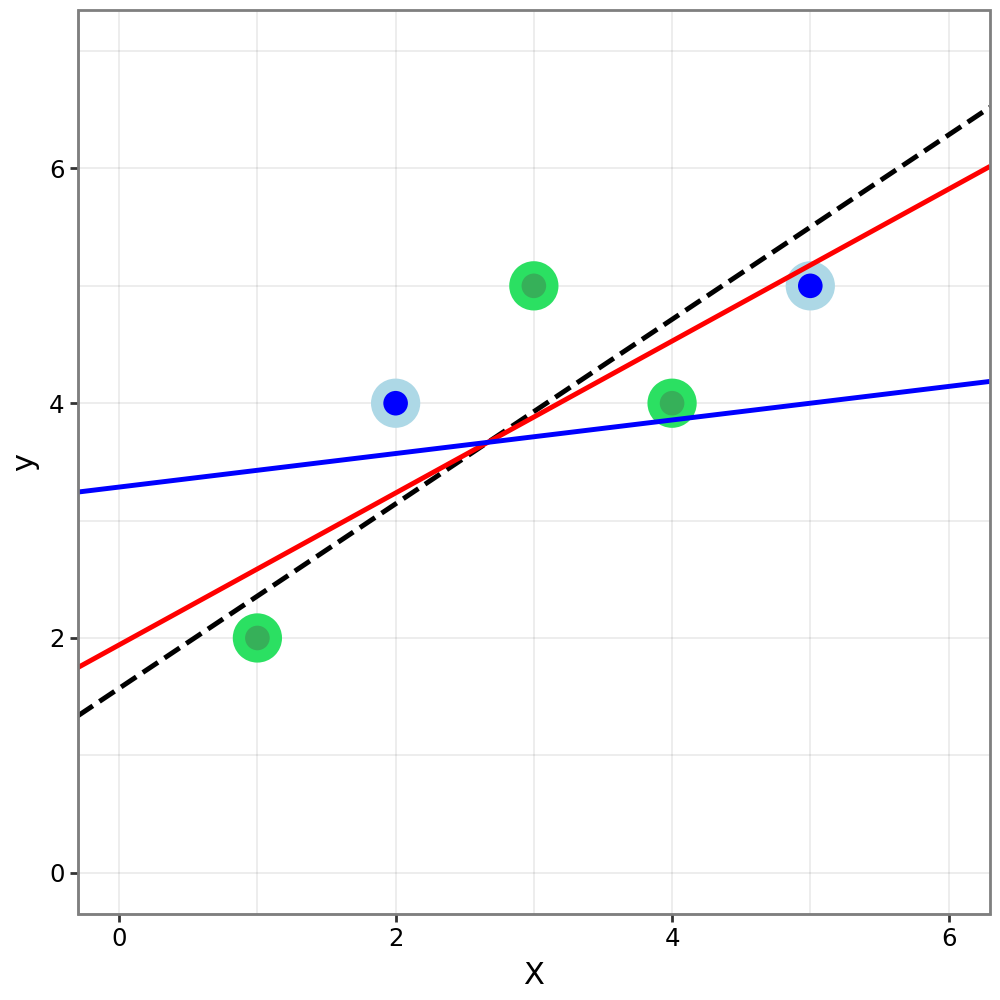

In [ ]:
fig = fig + geom_abline(intercept = lr.intercept_, slope = lr.coef_[0], linetype="dashed", size=1)
fig = fig + geom_abline(intercept = lr_ridge.intercept_, slope = lr_ridge.coef_[0], color="red", linetype="solid", size=1)
fig = fig + geom_abline(intercept = lr_lasso.intercept_, slope = lr_lasso.coef_[0], color="blue", linetype="solid", size=1)
fig

What can you say about this plot? How well each model performs? On train? On test?

Next, we shall evaluate model predictions on the test set, but first we need to generate these predictions:

In [ ]:
# predicting test set by each of the models
lr_pred = lr.predict(test_df[['x']])
lr_ridge_pred = lr_ridge.predict(test_df[['x']]).reshape((2,1))
lr_lasso_pred = lr_lasso.predict(test_df[['x']]).reshape((2,1)) # we need to reshape the resulting vector

We will again use **residual sum of squares** (**RSS**) as a performance metric:

In [ ]:
def rss(predicted, true): # RSS == Residual Sum of Squares
  return(np.sum((true - predicted)**2))

In [ ]:
# compute RSS by each model on test set using rss function
lr_rss = rss(lr_pred, test_df[['y']])
lr_ridge_rss = rss(lr_ridge_pred, test_df[['y']])
lr_lasso_rss = rss(lr_lasso_pred, test_df[['y']])

print(f'RSS for Linear Regression: {np.array(lr_rss)[0]}')
print(f'RSS for Ridge Regression: {np.array(lr_ridge_rss)[0]}')
print(f'RSS for Lasso Regression: {np.array(lr_lasso_rss)[0]}')

RSS for Linear Regression: 0.9846938775510198
RSS for Ridge Regression: 0.6159169550173008
RSS for Lasso Regression: 1.1836734693877553


These are performances of individual models.

Next, let's combine predictions of three regression models on test set into ensemble by averaging:

In [ ]:
np.array((lr_pred, lr_ridge_pred, lr_lasso_pred)).reshape((3,2))

array([[3.14285714, 5.5       ],
       [3.23529412, 5.17647059],
       [3.57142857, 4.        ]])

In [ ]:
ensemble_preds = np.mean([lr_pred, lr_ridge_pred, lr_lasso_pred], axis = 0)
print(ensemble_preds)

[[3.31652661]
 [4.89215686]]


What about RSS of averaged ensemble?

In [ ]:
ensemble_rss = rss(ensemble_preds, test_df[['y']])
print(np.array(ensemble_rss))

[0.47876602]


How do we visualise resulting model?

In [ ]:
background_data = pd.DataFrame({'x': np.linspace(start=0, stop=6, num=61)})
background_data

,x
0,0.0
1,0.1
2,0.2
3,0.3
4,0.4
...,...
56,5.6
57,5.7
58,5.8
59,5.9


In [ ]:
background_data['lr'] = lr.predict(background_data[['x']])
background_data['lr_ridge'] = lr_ridge.predict(background_data[['x']])
background_data['lr_lasso'] = lr_lasso.predict(background_data[['x']])
background_data['ensemble'] = background_data[['lr', 'lr_ridge', 'lr_lasso']].mean(axis = 1)
background_data.head()

,x,lr,lr_ridge,lr_lasso,ensemble
0,0.0,1.571429,1.941176,3.285714,2.266106
1,0.1,1.650000,2.005882,3.300000,2.318627
2,0.2,1.728571,2.070588,3.314286,2.371148
3,0.3,1.807143,2.135294,3.328571,2.423669
4,0.4,1.885714,2.200000,3.342857,2.476190


Let's make our ensemble orange (mature colour)

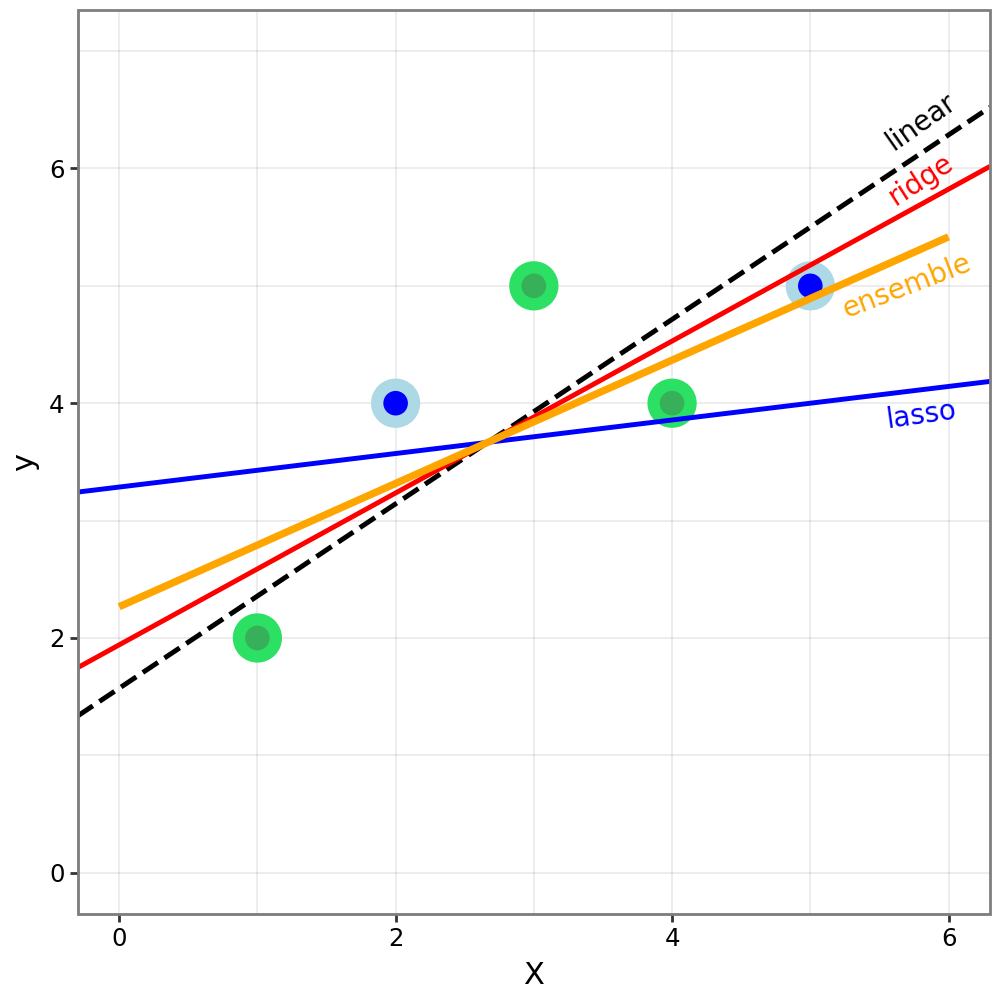

In [ ]:
fig = (
  fig + geom_path(data = background_data, mapping = aes(x = 'x', y = 'ensemble'), size = 1.5, colour = 'orange') +
  # each line like this adds a label into a specific position with a specific colour
  annotate("text", label = "linear", x = 5.8, y = 6.4, size = 10, colour = "black", angle = 35) +
  annotate("text", label = "ridge", x = 5.8, y = 5.9, size = 10, colour = "red", angle = 33) +
  annotate("text", label = "lasso", x = 5.8, y = 3.9, size = 10, colour = "blue", angle = 8) +
  annotate("text", label = "ensemble", x = 5.7, y = 5.0, size = 10, colour = "orange", angle = 21)
)
fig

Here we created a simple ensemble using three linear regression models via averaging. It is a nice example how you can create a stronger model by leveraging various models' strengths.

## Basic ensemble via majority vote (in case of classification)
In classification majority vote is used when predictions of different models are merged into an ensemble. But first we shall generate some synthetic data.

In [ ]:
def create_random_2c_data (D, N):
  """
  Function create_random_2c_data generates two sets of D dimensional
  points (N points each), one for each class. The first set is sampled from D
  dimensional Gaussian distribution with mean 0 and standard deviation 1. The
  second set is generated from the distribution, with mean 1 and standard
  deviation 1.
  """
  # Generating N points for the first class
  mu_vec1 = np.zeros(D) # creates a vector of zeros, these are averages across each dimension
  cov_mat1 = np.eye(D) # creates a diagonal matrix of size D x D, all values except diagonal are 0
  class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, N)

  # The same stuff as above, just averages are shifted into 1
  mu_vec2 = np.ones(D) # creates a vector of ones
  cov_mat2 = np.eye(D)
  class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, N)

  # a lot of boring things....
  # gluing together two matrices generated above
  data = pd.DataFrame(np.concatenate((class1_sample, class2_sample)))

  # Create names for columns
  data.columns = [ 'x' + str(i) for i in (np.arange(D)+1)]

  # Create a class column
  data['class'] = np.concatenate((np.repeat(0, N), np.repeat(1, N)))

  # This is important for plotting and modelling
  data['class'] = data['class'].astype('category')

  return data

In [ ]:
np.random.seed(2342347823) # random seed, this number was random, no need to make conspiracies around it

D = 2 # two dimensions
N = 100 # points per class

whole_data = create_random_2c_data(D, N)

In [ ]:
# Randomly splitting data into train (60%) and validation (40%)
from sklearn.model_selection import train_test_split
train, val = train_test_split(whole_data, random_state = 111, test_size = 0.40)

In [ ]:
def draw_points_ggplot2(point_set):
  fig = (
    ggplot(data = point_set,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(aes(colour = 'class',
                   shape = 'class',
                   fill = 'class'),
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x1',
        y = 'x2',
    ) +
    theme_bw() +
    scale_color_manual(['#EC5D57', '#51A7F9']) +
    scale_fill_manual(['#C82506', '#0365C0']) +
    scale_shape_manual(['o', 's']) +
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
  )
  return(fig)

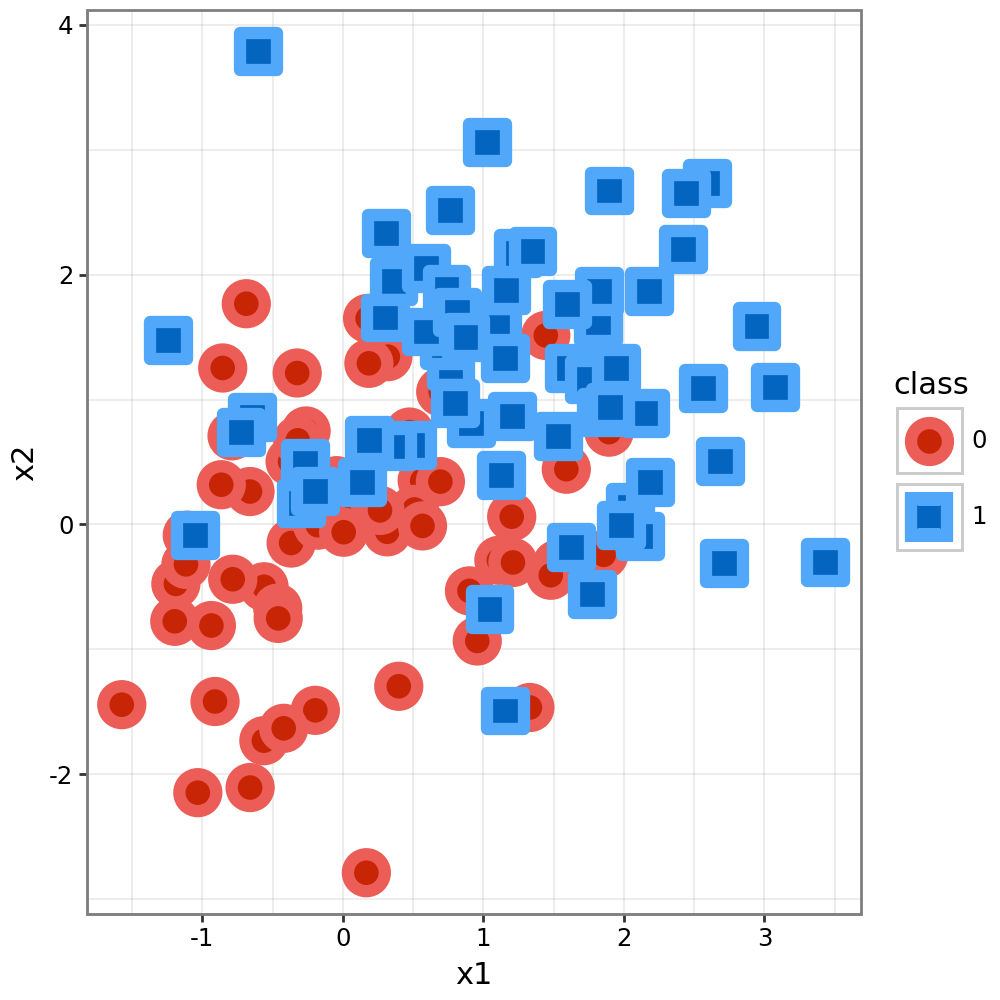

In [ ]:
# let's test it!
draw_points_ggplot2(train)

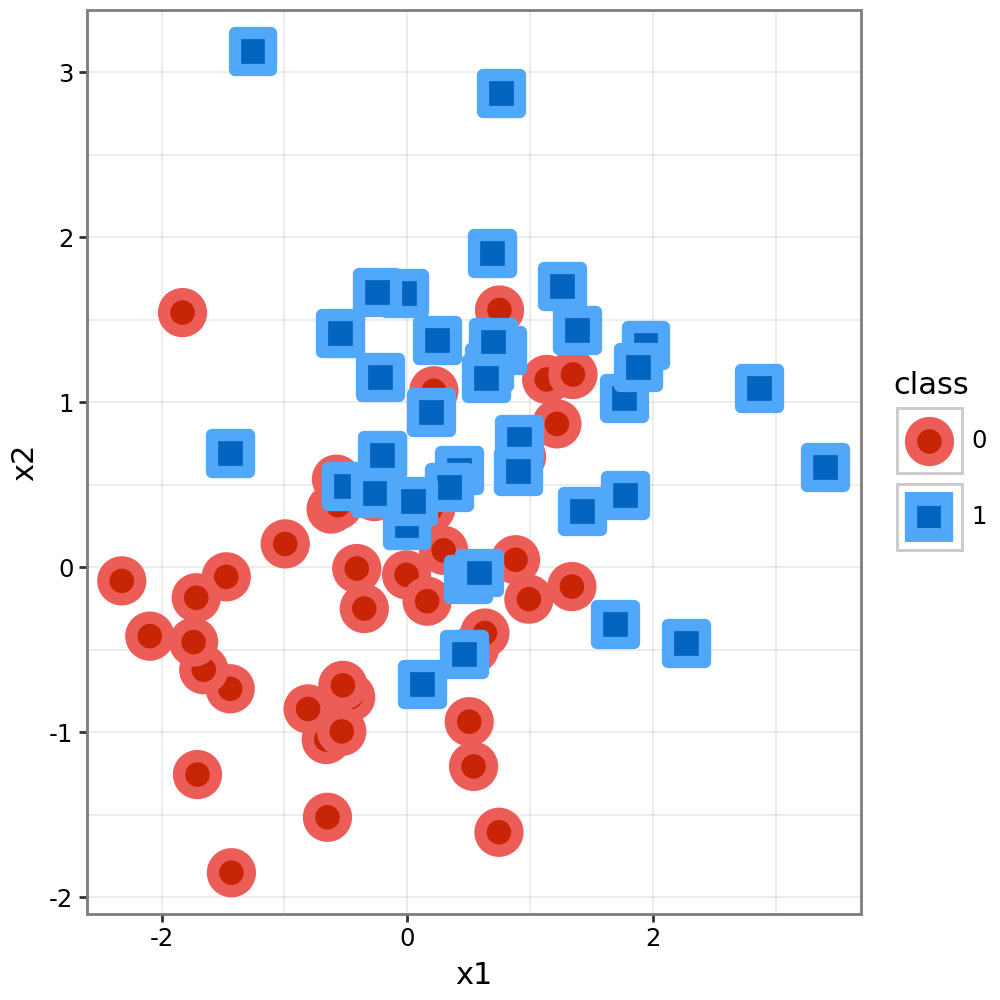

In [ ]:
draw_points_ggplot2(val)

Now we will train three different classifiers, namely DT, KNN and LogisticRegression, which is a classifier despite the name.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# a new guest - Logistic regression,
# this is actually a classifier (https://en.wikipedia.org/wiki/Logistic_regression)
from sklearn.linear_model import LogisticRegression

np.random.seed(1111) # random seed for consistency

# define all three classifiers
model1 = DecisionTreeClassifier(max_depth = 5)
model2 = KNeighborsClassifier()
model3 = LogisticRegression()

# train classifiers
model1.fit(train[['x1', 'x2']],train[['class']])
model2.fit(train[['x1', 'x2']],train[['class']])
model3.fit(train[['x1', 'x2']],train[['class']])

# predict validation set
val['model1'] = model1.predict(val[['x1', 'x2']])
val['model2'] = model2.predict(val[['x1', 'x2']])
val['model3'] = model3.predict(val[['x1', 'x2']])

Let's take a look at the current state of `val`

In [ ]:
val.head()

,x1,x2,class,model1,model2,model3
129,-1.440817,0.689593,1,0,0,0
79,-2.095889,-0.418547,0,0,0,0
126,-0.492024,0.490871,1,0,0,0
132,-0.197042,0.676853,1,1,0,0
35,0.217625,1.068660,0,1,0,1


Now that we have predictions from all three models, it is time to combine them using majority vote. Make a new column `ensemble` in the pandas data.frame `val` with ensembled predictions from three models. How can you do it? Hint: what mathematical function returns the value that appears most often.

In [ ]:
val[['model1']].mode(axis = 0)

,model1
0,0


In [ ]:
val[['model1']].value_counts()

,count
model1,
0,46
1,34


In [ ]:
##### YOUR CODE STARTS #####
val['ensemble'] = val[['model1', 'model2', 'model3']].mode(axis=1)
##### YOUR CODE ENDS #####

Finally, let's make sure we got it right:

In [ ]:
val.head()

,x1,x2,class,model1,model2,model3
129,-1.440817,0.689593,1,0,0,0
79,-2.095889,-0.418547,0,0,0,0
126,-0.492024,0.490871,1,0,0,0
132,-0.197042,0.676853,1,1,0,0
35,0.217625,1.068660,0,1,0,1


Let's evaluate three models and ensemble using accuracy. One handy way to compute accuracy of the `sklearn` model is to use function `score`. Each classification model has it own `score` method but in our case all of them return accuracy by default. You can use your own metric or choose one from the exhaustive list: https://scikit-learn.org/stable/modules/model_evaluation.html.

In [ ]:
print(f"Accuracy of DT {model1.score(val[['x1', 'x2']], val['class'])*100}%")
print(f"Accuracy of KNN {model2.score(val[['x1', 'x2']], val['class'])*100}%")
print(f"Accuracy of LR {model3.score(val[['x1', 'x2']], val['class'])*100}%")

Accuracy of DT 70.0%
Accuracy of KNN 72.5%
Accuracy of LR 73.75%


This trick will not work for ensemble (as we don't have a model object to call function `score`). Let's calculate the accuracy in old school way.

In [ ]:
print(f"Accuracy of ensemble of DT, NN and LR {(np.sum(val['ensemble'] == val['class'])/len(val))*100}%")

Accuracy of ensemble of DT, NN and LR 76.25%


Let's visualise decision boundaries of three classifiers and the ensemble.

In [ ]:
def generate_grid(start, stop, ppu):
  """
  Function that creates data for the
  decision boundary visualisation.
  """
  num_points = (stop - start)*ppu
  x = np.linspace(start, stop, num_points)
  y = np.linspace(start, stop, num_points)
  xx, yy = np.meshgrid(x, y)
  x1, x2 = xx.flatten(), yy.flatten()
  return(pd.DataFrame({'x1':  x1, 'x2': x2}))

In [ ]:
start = -3
stop = 4
ppu = 20 # points per unit

grid_data = generate_grid(start, stop, ppu)
print(grid_data.shape) # it should be (19600, 2)

(19600, 2)


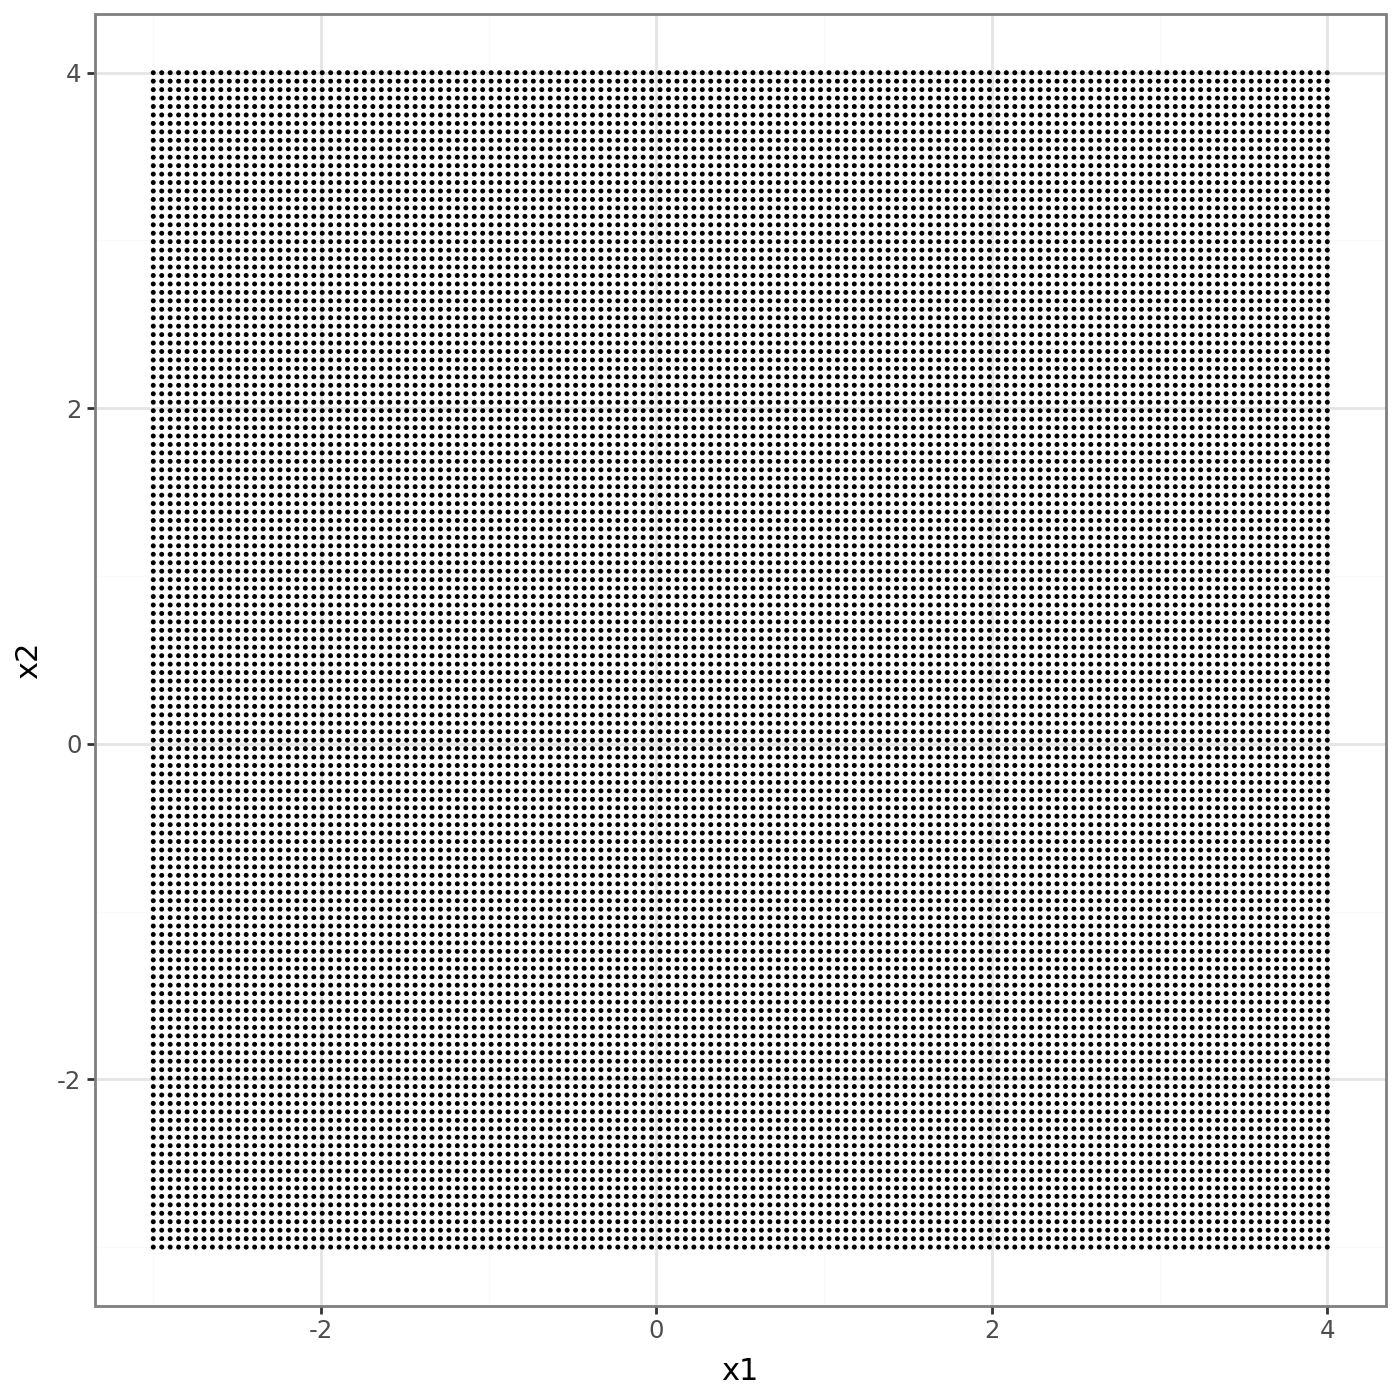

In [ ]:
fig = (
    ggplot(data = grid_data,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(colour = 'black', size = 0.005) +
    labs(title ='', x = 'x1', y = 'x2') +
    theme_bw() +
    theme(figure_size = (7, 7))
  )
fig

Now that you have the grid, predict each point of this grid by each of our models, including the ensemble:

In [ ]:
grid_data.shape

(19600, 2)

In [ ]:
grid_data

,x1,x2,model1
0,-3.000000,-3.0,0
1,-2.949640,-3.0,0
2,-2.899281,-3.0,0
3,-2.848921,-3.0,0
4,-2.798561,-3.0,0
...,...,...,...
19595,3.798561,4.0,1
19596,3.848921,4.0,1
19597,3.899281,4.0,1
19598,3.949640,4.0,1


In [ ]:
##### YOUR CODE STARTS #####
grid_data['model1'] = model1.predict(grid_data[["x1", "x2"]])
grid_data['model2'] = model2.predict(grid_data[["x1", "x2"]])
grid_data['model3'] = model3.predict(grid_data[["x1", "x2"]])
grid_data['ensemble'] = grid_data[['model1', 'model2', 'model3']].mode(axis=1)
##### YOUR CODE ENDS #####

We are ready to visualise each model covered with its respecting decision area

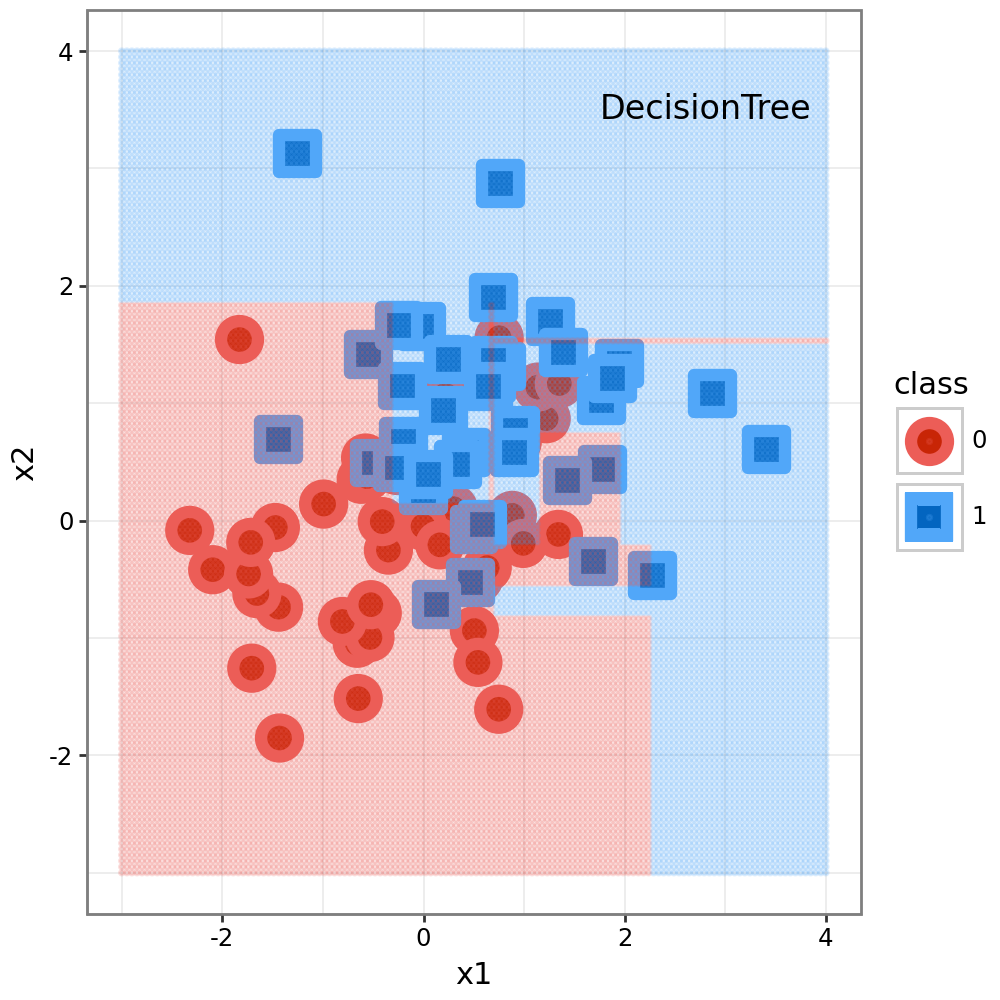

In [ ]:
draw_points_ggplot2(val) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model1)'),  size = .5, alpha = 0.2) + annotate("text", label = "DecisionTree", x = 2.8, y = 3.5, size = 12, colour = "black")

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 10))
plot_tree(model1, impurity=False, fontsize = 10, filled = True)
plt.show()

In [ ]:
draw_points_ggplot2(val) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model2)'),  size = .5, alpha = 0.2) + annotate("text", label = "K-NN", x = 2.8, y = 3.5, size = 12, colour = "black")

In [ ]:
draw_points_ggplot2(val) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model3)'),  size = .5, alpha = 0.2) + annotate("text", label = "LogisticRegression", x = 2.5, y = 3.5, size = 12, colour = "black")

In [ ]:
draw_points_ggplot2(val) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(ensemble)'),  size = .5, alpha = 0.2) + annotate("text", label = "Ensemble", x = 2.8, y = 3.5, size = 12, colour = "black")

Our traditional show, "how the same is implemented in `sklearn` using one line of code?". Today our guest is `VotingClassifier`, this function implements simple ensemble using different classifiers. Let's see how it works.

In [ ]:
# Import our guest
from sklearn.ensemble import VotingClassifier
np.random.seed(1111) # nothing interesting here, read on

# Specify correct estimators/classifiers
ensemble_model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('logr', model3)], voting='hard')

# Train the VotingClassifier model on training data
ensemble_model.fit(train[['x1', 'x2']],train[['class']])

# Predict validation data using trained model
val['ensemble'] = ensemble_model.predict(val[['x1', 'x2']])

# Use score function to evaluate VotingClassifier's performance
print(f"Accuracy of sklearn ensemble {ensemble_model.score(val[['x1', 'x2']], val[['class']])*100}%")

To remind ourselves the accuracy of our handmade ensemble and individual models:

In [ ]:
print(f"Accuracy of our ensemble was {np.mean(val['ensemble'] == val['class'])*100}%")
print(f"Accuracy of DT {model1.score(val[['x1', 'x2']], val['class'])*100}%")
print(f"Accuracy of KNN {model2.score(val[['x1', 'x2']], val['class'])*100}%")
print(f"Accuracy of LR {model3.score(val[['x1', 'x2']], val['class'])*100}%")

## Bagging (**B**ootstrap + **AGG**regation = **BAGG**ing)

### Bootstrap (1st step)

Here is the familiar decision tree model we have built before:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(1111) # random seed for consistency

model1 = DecisionTreeClassifier()
model1.fit(train[['x1', 'x2']],train[['class']])
single_model_score = model1.score(val[['x1', 'x2']], val[['class']])*100
print(f"Accuracy of a single DT {single_model_score}%")

Let's bootstrap 3 equal random parts of training data.

In [ ]:
from sklearn.utils import resample
n_bootstraps = 3
np.random.seed(1111)

# the following line randomly chooses 80% of data and stores
# row indices into a resamples variable this is done [n_bootstraps] times
resamples = [resample(train, n_samples = int(len(train)*0.8), replace=False).index.values for i in range(n_bootstraps)]

**NB!** What is the difference between using `np.random.seed = 1111` as a separate command and `random_state = 1111` inside resample function?

In [ ]:
resamples

In [ ]:
# first resample
train_resample1 = train.loc[resamples[0]]

# second resample
train_resample2 = train.loc[resamples[1]]

# third resample
train_resample3 = train.loc[resamples[2]]

In [ ]:
draw_points_ggplot2(train_resample1)

In [ ]:
draw_points_ggplot2(train_resample2)

Let's train **3** identical DTs on each resample.

In [ ]:
# We couldn't use only one variable as
# we wouldn't be able to capture progress of each DT independently
model1 = DecisionTreeClassifier()
model2 = DecisionTreeClassifier()
model3 = DecisionTreeClassifier()

In [ ]:
np.random.seed(1111) # random seed for consistency

# Note, that we cannot use VotingClassifier as before,
# as each tree has to be trained on its own data
model1.fit(train_resample1[['x1','x2']], train_resample1[['class']])
model2.fit(train_resample2[['x1','x2']], train_resample2[['class']])
model3.fit(train_resample3[['x1','x2']], train_resample3[['class']])

In [ ]:
start = -3
stop = 4
ppu = 20 # points per unit

grid_data = generate_grid(start, stop, ppu)

grid_data['model1'] = model1.predict(grid_data[['x1', 'x2']])
grid_data['model2'] = model2.predict(grid_data[['x1', 'x2']])
grid_data['model3'] = model3.predict(grid_data[['x1', 'x2']])

Let's visualise these resamples

In [ ]:
draw_points_ggplot2(train_resample1) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model1)'),  size = .5, alpha = 0.2)

In [ ]:
draw_points_ggplot2(train_resample2) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model2)'),  size = .5, alpha = 0.2)

In [ ]:
draw_points_ggplot2(train_resample3) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model3)'),  size = .5, alpha = 0.2)

### Aggregation (2nd step)

In [ ]:
val.head()

In [ ]:
val['model1'] = model1.predict(val[['x1', 'x2']])
val['model2'] = model2.predict(val[['x1', 'x2']])
val['model3'] = model3.predict(val[['x1', 'x2']])

In [ ]:
val['bagg_ensemble'] = val[['model1', 'model2', 'model3']].mode(axis = 1)

In [ ]:
print(f"Accuracy of hand made bagged ensemble with 3 DTs {np.sum(val['bagg_ensemble'] == val['class'])/len(val[['class']])*100}%")

In [ ]:
print(f"Accuracy of a single DT {single_model_score}%")

## Bagging in sklearn
Again, making things much shorter using `sklearn` :)

In [ ]:
# In sklearn, there is also BaggingRegressor as might have imagined
# BaggingClassifier is called Bagging meta-estimator
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# humdrum random seed thingy
np.random.seed(1111)
n_estimators_ = 3
bagger = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=n_estimators_, max_samples=0.8)

# Train bagger
bagger.fit(train[['x1','x2']], train['class'])

print(f"Accuracy of sklearn bagging with {n_estimators_} DTs {bagger.score(val[['x1', 'x2']], val[['class']])*100}%")

What if we try more estimators?

In [ ]:
# Initialise our bagging classifier that consists of 9 DTs
n_estimators_ = 9
bagger = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                        n_estimators=n_estimators_, max_samples=0.8, random_state = 1).fit(train[['x1','x2']], train['class'])

print(f"Accuracy of sklearn bagging with {n_estimators_} DTs {bagger.score(val[['x1', 'x2']], val[['class']])*100}%")

What happens if you would try even number of estimators?

## Random Forest algorithm
Here we will not implement the Random Forest algorithm, but we will get very close to its understanding.

First, let's regenerate some data:

In [ ]:
np.random.seed(2342347823) # random seed for consistency

D = 50
N = 50

train_data = create_random_2c_data(D, N)

from sklearn.model_selection import train_test_split, cross_val_score
train, val = train_test_split(train_data, random_state = 111, test_size = 0.40)

Regular `DecisionTree` will suffer from the curse of dimensionality with this high-dimensional data. Let's recreate this experiment:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

np.random.seed(1111)
# 2D data
model.fit(train[['x1','x2']], train['class'])
print(f"Validation accuracy is {model.score(val[['x1','x2']], val[['class']])*100}%")

# 5D data
model.fit(train.iloc[:, :5], train['class'])
print(f"Validation accuracy is {model.score(val.iloc[:, :5], val[['class']])*100}%")

# 50D data
model.fit(train.iloc[:, :50], train['class'])
print(f"Validation accuracy is {model.score(val.iloc[:, :50], val[['class']])*100}%")

More stable estimates can be obtained using `cross_val_score` function

In [ ]:
model = DecisionTreeClassifier()

np.random.seed(1111)

# as `cross_val_score` does not shuffle the data by itself
shuffled_train_data = train_data.sample(frac=1)

# 2D data
scores_model1 = cross_val_score(model, shuffled_train_data[['x1','x2']], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy on 2D is {np.mean(scores_model1)*100}%')

# 5D data
scores_model2 = cross_val_score(model, shuffled_train_data.iloc[:, :5], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy on 5D is {np.mean(scores_model2)*100}%')

# 50D data
scores_model3 = cross_val_score(model, shuffled_train_data.iloc[:, :50], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy on 50D is {np.mean(scores_model3)*100}%')

Not a fair comparison, because DT is a single classifier, while random forest is an ensemble of multiple decision trees.

In [ ]:
bagger = BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8, n_estimators=9, random_state=1111)

# 2D data
scores_model1 = cross_val_score(bagger, shuffled_train_data[['x1','x2']], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy on 2D is {np.mean(scores_model1)*100}%')

# 5D data
scores_model2 = cross_val_score(bagger, shuffled_train_data.iloc[:, :5], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy on 5D is {np.mean(scores_model2)*100}%')

# 50D data
scores_model3 = cross_val_score(bagger, shuffled_train_data.iloc[:, :50], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy on 50D is {np.mean(scores_model3)*100}%')

To make another step from the bag of decision trees to random forest, we can set a value for `max_features` parameter to something that is less than 1.0 (e.g. 0.8). This would ensure that every tree in the bag receives a random set of initial features.

In [ ]:
bagger = BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples = 0.8, max_features = 0.8, n_estimators=9, random_state=1111)

# 2D data
scores_model1 = cross_val_score(bagger, shuffled_train_data[['x1','x2']], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy on 2D is {np.mean(scores_model1)*100}%')

# 5D data
scores_model2 = cross_val_score(bagger, shuffled_train_data.iloc[:, :5], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy on 5D is {np.mean(scores_model2)*100}%')

# 50D data
scores_model3 = cross_val_score(bagger, shuffled_train_data.iloc[:, :50], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy on 50D is {np.mean(scores_model3)*100}%')

Finally, let's train the random classifier itself.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

np.random.seed(1111)

# 2D data
scores_model1 = cross_val_score(model, shuffled_train_data[['x1','x2']], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy for model1 is {np.mean(scores_model1)*100}%')

# 5D data
scores_model2 = cross_val_score(model, shuffled_train_data.iloc[:, :5], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy for model2 is {np.mean(scores_model2)*100}%')

# 50D data
scores_model3 = cross_val_score(model, shuffled_train_data.iloc[:, :50], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy for model3 is {np.mean(scores_model3)*100}%')

Extremely Randomized Trees (extreme RF)
via https://link.springer.com/article/10.1007/s10994-006-6226-1

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

np.random.seed(1111)

# 2D data
scores_model1 = cross_val_score(model, shuffled_train_data[['x1','x2']], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy for model1 is {np.mean(scores_model1)*100}%')

# 5D data
scores_model2 = cross_val_score(model, shuffled_train_data.iloc[:, :5], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy for model2 is {np.mean(scores_model2)*100}%')

# 50D data
scores_model3 = cross_val_score(model, shuffled_train_data.iloc[:, :50], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy for model3 is {np.mean(scores_model3)*100}%')